In [1]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# df = pd.read_csv('hugging_face_classification_data.csv')
# df = df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)
# df.head()

,label,sentence1
0,other,Beschwerden re. Achillessehne. NMR unauffällig...
1,meniskus_urgent,Seit mehreren Monaten Beschwerden re. Achilles...
2,meniskus_urgent,. .Gestern beim Training stechende Schmerzen l...
3,meniskus_urgent,beide Knie Schmerzen bei Treppe steigen oder L...
4,other,(08.19 Uhr); bewegungsabhängig.Schmerzen wiede...


In [5]:
# df = pd.read_csv('hugging_face_classification_data.csv')

In [7]:
# train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# # Further split train + validation into train and validation sets (75% train, 25% validation from the train+val set)
# train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# # Save the splits to CSV files
# train_df.to_csv('train.csv', index=False)
# val_df.to_csv('validation.csv', index=False)
# test_df.to_csv('test.csv', index=False)

In [10]:
%%bash
python run_text_classification.py \
--model_name_or_path google-bert/bert-base-german-cased \
--train_file train.csv \
--validation_file validation.csv \
--output_dir output/ \
--test_file test.csv \
--do_train \
--do_eval \
--do_predict

07/19/2024 23:36:32 - INFO - __main__ - Training/evaluation parameters TFTrainingArguments(
_n_gpu=-1,
accelerator_config=None,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=True,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=no,
evaluation_strategy=None,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'min_num_params': 0, 'xla': False, 'xla_fsdp_v2': False, 'xl

Map: 100%|██████████| 9052/9052 [00:00<00:00, 13963.62 examples/s]
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


07/19/2024 23:36:34 - WARNING - absl - At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy TF-Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.
Epoch 1/3
3394/3394 [==============================] - 3270s 953ms/step - loss: 1.1431 - accuracy: 0.5400 - val_loss: 1.0756 - val_accuracy: 0.5904
Epoch 2/3
3394/3394 [==============================] - 3235s 953ms/step - loss: 0.9772 - accuracy: 0.6335 - val_loss: 1.0966 - val_accuracy: 0.5985
Epoch 3/3
3394/3394 [==============================] - 3196s 942ms/step - loss: 0.7346 - accuracy: 0.7465 - val_loss: 1.2971 - val_accuracy: 0.5913
07/20/2024 02:18:17 - INFO - __main__ - Computing metrics on validation data...
1132/1132 [==============================] - 164s 145ms/step - loss: 1.2971 - accuracy: 0.5913
07/20/2024 02:21:01 - INFO - __main__ - Eval loss: 1.29708, Eval accuracy: 59.1251%
07/20/2024 02:21:01 - INFO - __main__ - Doing predictions on test dataset

In [16]:
import pandas as pd
predictions = pd.read_csv('output/test_results.txt', sep="	")
predictions.columns = ["index","prediction"]

In [17]:
predictions.head()

,index,prediction
0,0,other
1,1,meniskus_urgent
2,2,other
3,3,meniskus_urgent
4,4,meniskus_urgent


In [18]:
test = pd.read_csv('test.csv')

In [19]:
test

,label,sentence1
0,other,Seit ca 1 Jahr Schmerzen im re>li Knie. Maxima...
1,other,Seit ca 2-3 Monaten Innenseitigeschmerzen li. ...
2,other,Seit ca. 6 Monaten schmerzen im Knie; bei Bela...
3,other,Seit Dezember 2018 Schmerzen im linken Kniegel...
4,meniskus_urgent,Seit ca. 1 Jahr Schwellneigung nach Belastung....
...,...,...
9047,other,Seit 1 Jahr Schmerzen im rechten Knie; dann Ve...
9048,meniskus_urgent,Penicillamin Aspergillus GB: flüssig ...
9049,meniskus_urgent,Vor circa einem Jahr aus dem Schneidersitz auf...
9050,meniskus_urgent,Seit 8/09 Beschwerden linke Knie ohne Trauma. ...


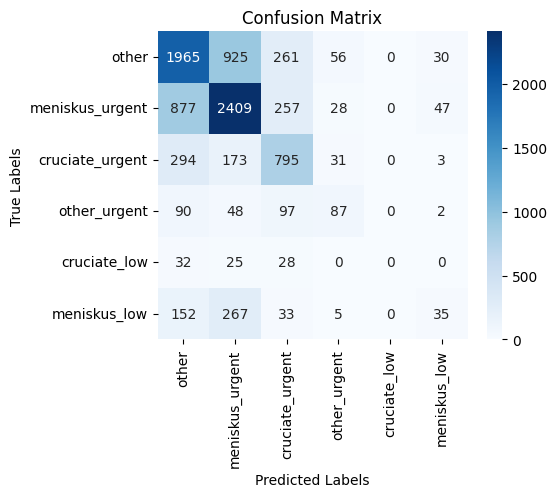

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

true_labels = test["label"].to_list()
predicted_labels = predictions["prediction"].to_list()
target_labels = labels=test["label"].unique().tolist()

cm = confusion_matrix(true_labels, predicted_labels, labels=target_labels)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test["label"].unique().tolist(), yticklabels=test["label"].unique().tolist())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [24]:
from sklearn.metrics import f1_score
f1_score(true_labels, predicted_labels, average='micro')

0.5845117101193107